In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-01-02 06:05:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.207, 108.177.111.207, 142.250.1.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  28.9MB/s    in 5.8s    

2024-01-02 06:05:06 (85.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

for dirpath, dirnames, filenames in  os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [4]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in  data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 384, 3)
[[[73 58 55]
  [78 63 60]
  [85 69 69]
  ...
  [37 57 46]
  [42 64 51]
  [37 61 47]]

 [[71 56 53]
  [76 61 58]
  [83 67 67]
  ...
  [30 50 39]
  [24 46 33]
  [30 54 40]]

 [[72 57 54]
  [77 62 59]
  [84 68 68]
  ...
  [60 77 67]
  [41 61 50]
  [27 49 37]]

 ...

 [[79 73 41]
  [74 68 36]
  [74 65 34]
  ...
  [56 65 62]
  [56 65 60]
  [56 67 61]]

 [[77 72 40]
  [73 68 36]
  [72 66 34]
  ...
  [55 66 62]
  [55 66 60]
  [55 68 61]]

 [[66 63 30]
  [66 63 30]
  [69 64 32]
  ...
  [55 66 62]
  [54 67 60]
  [55 68 61]]]


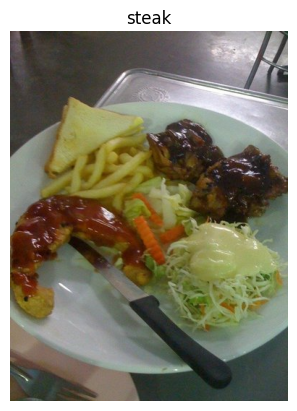

In [7]:
image = view_random_image(train_dir, random.choice(class_names))
print(image)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical'
                                               )




Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
import tensorflow as tf
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])


model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 632s 3s/step - loss: 2.1970 - accuracy: 0.1803 - val_loss: 1.9911 - val_accuracy: 0.2876
Epoch 2/5
235/235 [==============================] - 614s 3s/step - loss: 1.9728 - accuracy: 0.3049 - val_loss: 1.9675 - val_accuracy: 0.2764
Epoch 3/5
235/235 [==============================] - 604s 3s/step - loss: 1.7736 - accuracy: 0.3957 - val_loss: 1.8872 - val_accuracy: 0.3532
Epoch 4/5
235/235 [==============================] - 601s 3s/step - loss: 1.3212 - accuracy: 0.5593 - val_loss: 2.0576 - val_accuracy: 0.3284
Epoch 5/5
235/235 [==============================] - 573s 2s/step - loss: 0.7240 - accuracy: 0.7721 - val_loss: 2.8103 - val_accuracy: 0.2932


In [ ]:
model.evaluate(test_data)

79/79 [==============================] - 57s 710ms/step - loss: 2.8103 - accuracy: 0.2932


[2.810347080230713, 0.29319998621940613]

In [10]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


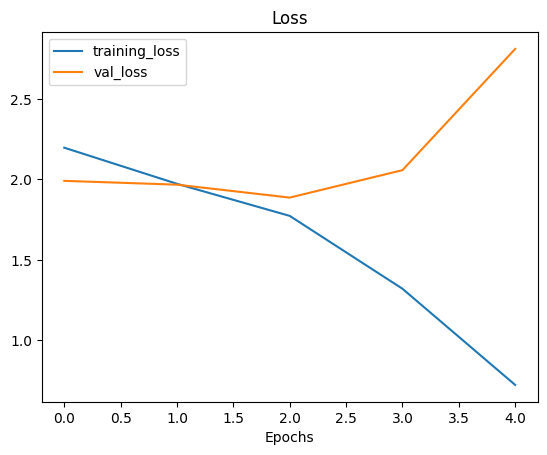

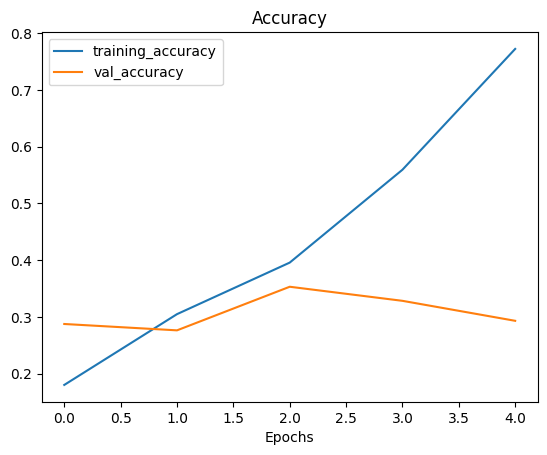

In [ ]:
plot_loss_curve(history)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
model.save('/content/model/10_class_model_overfit')

In [ ]:
model.save('10_class_model_overfit.h5')

In [2]:
!zip -r /content/10_food_classes_all_data.zip /content/10_food_classes_all_data

Streaming output truncated to the last 5000 lines.
  adding: content/10_food_classes_all_data/train/ice_cream/833261.jpg (deflated 0%)
  adding: content/10_food_classes_all_data/train/ice_cream/1954378.jpg (deflated 1%)
  adding: content/10_food_classes_all_data/train/ice_cream/1795163.jpg (deflated 1%)
  adding: content/10_food_classes_all_data/train/ice_cream/2106008.jpg (deflated 0%)
  adding: content/10_food_classes_all_data/train/ice_cream/85514.jpg (deflated 1%)
  adding: content/10_food_classes_all_data/train/ice_cream/3465704.jpg (deflated 1%)
  adding: content/10_food_classes_all_data/train/ice_cream/242794.jpg (deflated 0%)
  adding: content/10_food_classes_all_data/train/ice_cream/2480174.jpg (deflated 1%)
  adding: content/10_food_classes_all_data/train/ice_cream/3801217.jpg (deflated 1%)
  adding: content/10_food_classes_all_data/train/ice_cream/3384471.jpg (deflated 1%)
  adding: content/10_food_classes_all_data/train/ice_cream/2779104.jpg (deflated 1%)
  adding: content/

As We see the above model doesn't perform well in  test data (unseen data) it overfits so  now we are going to do hyerparmeter tuning or regularization to reduce overfit


First we try  the  hyperparameter tuninng, we'll  remove two of the convolutional layers, taking the total number of convolutional layers frm  four to two

In [15]:
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape= (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])


model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [16]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 310s 1s/step - loss: 2.0898 - accuracy: 0.2545 - val_loss: 1.9251 - val_accuracy: 0.3312
Epoch 2/5
235/235 [==============================] - 295s 1s/step - loss: 1.6971 - accuracy: 0.4227 - val_loss: 1.8240 - val_accuracy: 0.3668
Epoch 3/5
235/235 [==============================] - 302s 1s/step - loss: 1.3085 - accuracy: 0.5815 - val_loss: 1.8753 - val_accuracy: 0.3616
Epoch 4/5
235/235 [==============================] - 295s 1s/step - loss: 0.8602 - accuracy: 0.7385 - val_loss: 2.1124 - val_accuracy: 0.3332
Epoch 5/5
235/235 [==============================] - 302s 1s/step - loss: 0.4482 - accuracy: 0.8839 - val_loss: 2.4945 - val_accuracy: 0.3200


In [17]:
model_1.evaluate(test_data)

79/79 [==============================] - 36s 451ms/step - loss: 2.4945 - accuracy: 0.3200


[2.4945077896118164, 0.3199999928474426]

It seems the model doesn't learn anything

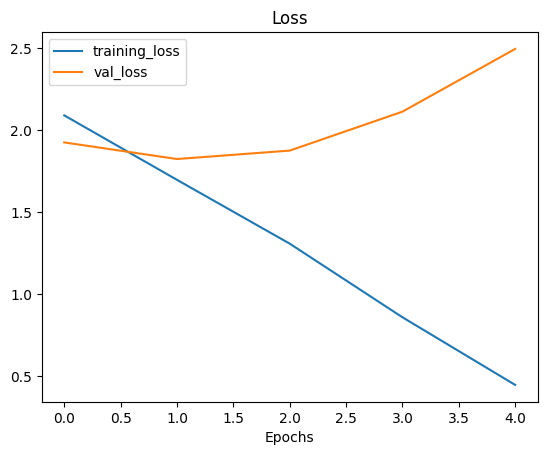

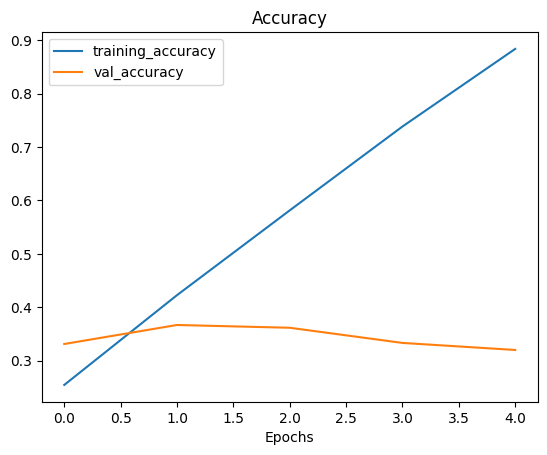

In [19]:
plot_loss_curve(history_1)